# **Data Source**
- Influenza vaccine coverage [CDC](https://app.powerbigov.us/view?r=eyJrIjoiNGQxYTM4MjgtZjUxZC00MWFhLWI2MmMtNTkxOGJkMWM2MWJjIiwidCI6IjljZTcwODY5LTYwZGItNDRmZC1hYmU4LWQyNzY3MDc3ZmM4ZiJ9&pageName=ReportSectionf6074994465a5de247b7)
- Population by state [StatsAmerica](https://www.statsamerica.org/downloads/default.aspx)
- Number of newborns [CDC](https://www.cdc.gov/nchs/nvss/vsrr/provisional-tables.htm), [CDC](https://www.cdc.gov/nchs/data/vsrr/vsrr028.pdf)
- Mean income by State [US Census Bureau](https://data.census.gov/table/ACSST5Y2022.S1902?q=median%20household%20income%20by%20state&tid=ACSST5Y2021.S1902)
- Inlfuenza burden by year [CDC](https://www.cdc.gov/flu/about/burden/past-seasons.html): to be reconsidered
- Influenza vaccine effectiveness [CDC](https://www.cdc.gov/flu/vaccines-work/past-seasons-estimates.html)
- Number of COVID cases [CDC](https://data.cdc.gov/Case-Surveillance/Weekly-United-States-COVID-19-Cases-and-Deaths-by-/pwn4-m3yp/about_data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# Table input
df=pd.read_csv('/content/drive/MyDrive/HIDS_7006/Project/Project_Flu_Prediction/Processed_data/merged_data_v5.csv')
print(df.shape)
print(df.head())

(658, 18)
     state  season  coverage_estimate    age0_4    age5_17   age18_24  \
0  Alabama    2010               42.4  5.167979  17.483774  10.152713   
1  Alabama    2011               41.6  5.136912  17.321674  10.161898   
2  Alabama    2012               45.7  5.061592  17.184001  10.202012   
3  Alabama    2013               48.3  4.956669  17.083564  10.197942   
4  Alabama    2014               45.8  4.895829  16.982873  10.048392   

    age25_44   age45_64  age65over  total_population  income    ve  \
0  26.002505  27.208057  13.984971           4725387   57655  56.0   
1  25.849170  27.351919  14.178426           4739715   59015  60.0   
2  25.757094  27.122536  14.672766           4757140   59273  47.0   
3  25.711905  26.970247  15.079672           4771914   59631  49.0   
4  25.690865  26.870592  15.511450           4782377   60205  52.0   

   covid_cases  total_burden  prev_year_flu_symp_percentage  \
0          0.0      13704900                      67.858941   
1   

# **III. Data Preprocessing**

### **1) Feature/Outcome Data Split**

In [ ]:
# Split into feature and outcome data


X_df=df.drop(['coverage_estimate'], axis=1) #feature
y_df=df['coverage_estimate'] #outcome

In [ ]:
# Check data structure, description.

print(X_df.info())
print(y_df.info())

# state, --> object (income needs to be changed to numerical datatype: through feature engineering)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   state                                  658 non-null    object 
 1   season                                 658 non-null    int64  
 2   age0_4                                 658 non-null    float64
 3   age5_17                                658 non-null    float64
 4   age18_24                               658 non-null    float64
 5   age25_44                               658 non-null    float64
 6   age45_64                               658 non-null    float64
 7   age65over                              658 non-null    float64
 8   total_population                       658 non-null    int64  
 9   income                                 658 non-null    int64  
 10  ve                                     658 non-null    float64
 11  covid_

### **2) Feature Engineering**

In [ ]:
# Check missing values of X_df
missing_X=X_df.isna().sum()
missing_X
# No missing values

state                                    0
season                                   0
age0_4                                   0
age5_17                                  0
age18_24                                 0
age25_44                                 0
age45_64                                 0
age65over                                0
total_population                         0
income                                   0
ve                                       0
covid_cases                              0
total_burden                             0
prev_year_flu_symp_percentage            0
prev_year_flu_visit_percentage           0
prev_year_hospitalizations_percentage    0
prev_year_flu_death_percentage           0
dtype: int64

In [ ]:
# Check missing values of y_df
missing_y=y_df.isna().sum()
missing_y
# No missing values

0

In [ ]:
# Split into test train sets

from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test=train_test_split(X_df,y_df,test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(526, 17)
(132, 17)
(526,)
(132,)


In [ ]:
y_test

592    61.1
310    39.6
291    46.0
63     51.7
350    51.0
       ... 
70     49.9
405    43.6
381    52.1
542    47.3
18     37.9
Name: coverage_estimate, Length: 132, dtype: float64

In [ ]:
# Separate columns
continuous=X_train.columns[1:]
categorical=X_train.columns[0]

X_train_continuous=X_train[continuous]
X_test_continuous=X_test[continuous]
X_train_categorical=X_train[categorical]
X_test_categorical=X_test[categorical]

In [ ]:
# Standardize continuous features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train_continuous)
X_train_continuous=scaler.transform(X_train_continuous)
X_test_continuous=scaler.transform(X_test_continuous)

In [ ]:
X_train_continuous

array([[ 0.75095936,  0.0244035 , -0.14646933, ...,  0.72698237,
        -0.14614416, -0.25521223],
       [-0.5710106 ,  0.01827339, -0.18013229, ..., -0.6626505 ,
        -0.61250444,  0.56236399],
       [-0.5710106 ,  0.30030881,  0.35626928, ..., -0.6626505 ,
        -0.61250444,  0.56236399],
       ...,
       [-1.62858656, -0.72859922, -0.39128682, ...,  0.674165  ,
        -0.98297148, -1.34590436],
       [ 1.27974734, -0.75945614, -0.25319553, ...,  0.674165  ,
        -0.98297148, -1.34590436],
       [ 1.54414133, -1.17437193, -0.91482635, ...,  0.23926536,
        -1.00992212, -1.35549022]])

In [ ]:
print(X_train_continuous.shape)
print(X_test_continuous.shape)

(526, 16)
(132, 16)


In [ ]:
# One-hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train_categorical = pd.DataFrame(X_train_categorical)
X_test_categorical = pd.DataFrame(X_test_categorical)
encoder.fit(X_train_categorical)
X_train_categorical=encoder.transform(X_train_categorical)
X_test_categorical=encoder.transform(X_test_categorical)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train_categorical.shape

(526, 51)

In [ ]:
X_test_categorical.shape

(132, 51)

In [ ]:
!pip install us

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.2 MB/s eta 0:00:00
  Created wheel for us: filename=us-3.1.1-py3-none-any.whl size=12547 sha256=899ae643973c15d10919f0237c3e7ce13a7e91b9611d97b9f2a06b0444e8a5f8
  Stored in directory: /root/.cache/pip/wheels/da/f9/64/9669135a7ce533faf78e3b32259c505f964f03b069be6844f8
Successfully built us


In [ ]:
import us
us_states=[state.name for state in us.states.STATES]
us_states.append("District of Columbia")
us_states=sorted(us_states)
us_states

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [ ]:
# Combine both features

X_train_continuous_df = pd.DataFrame(X_train_continuous, columns=continuous)
categorical=us_states
#type(categorical)
X_train_categorical_df = pd.DataFrame(X_train_categorical, columns=categorical)

X_train = pd.concat([X_train_continuous_df, X_train_categorical_df], axis=1)

X_test_continuous_df = pd.DataFrame(X_test_continuous, columns=continuous)
X_test_categorical_df = pd.DataFrame(X_test_categorical, columns=categorical)
X_test = pd.concat([X_test_continuous_df, X_test_categorical_df], axis=1)



In [ ]:
X_train.shape

(526, 67)

In [ ]:
X_test.shape

(132, 67)

In [ ]:
X_train

,season,age0_4,age5_17,age18_24,age25_44,age45_64,age65over,total_population,income,ve,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0.750959,0.024404,-0.146469,-0.489205,-0.324412,0.038080,0.486832,-0.267047,-0.581398,-1.321495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.571011,0.018273,-0.180132,0.259409,0.542892,0.462996,-0.769170,0.294994,0.527685,0.873527,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.571011,0.300309,0.356269,-0.938718,0.908709,-0.136298,-0.604713,-0.508993,-0.629540,0.873527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.015353,-0.364219,0.036272,-0.364137,1.229742,-0.640730,-0.313397,4.848122,1.936667,-0.367137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.544141,1.151509,2.767487,2.804691,1.238487,-3.231993,-1.526917,-0.427688,1.924161,-0.653444,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,0.222171,-0.155658,-0.016746,-0.467771,1.577955,-0.352630,-0.794467,-0.099180,0.526167,-0.271702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
522,-0.835405,0.050613,-3.777556,3.111579,5.643636,-1.978297,-1.725338,-0.826158,1.296436,0.587220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
523,-1.628587,-0.728599,-0.391287,0.938627,0.148739,0.999341,-0.779304,0.040985,0.374942,1.255270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
524,1.279747,-0.759456,-0.253196,-0.342463,-0.201770,-0.039506,0.653048,0.610995,0.313687,-0.009253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Check collinearity
correlation_matrix=X_train.corr()
correlation_matrix

,season,age0_4,age5_17,age18_24,age25_44,age45_64,age65over,total_population,income,ve,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
season,1.000000,-0.392840,-0.198069,-0.400931,0.020000,-0.387284,0.636152,0.024216,0.560869,-0.591703,...,-0.009447,0.032470,0.000282,-0.013239,-0.032703,-0.016551,-0.027962,0.012525,0.004368,-0.001140
age0_4,-0.392840,1.000000,0.813804,0.381004,0.301596,-0.512163,-0.739485,-0.003287,-0.308583,0.199285,...,0.181157,-0.021278,0.211249,0.438751,-0.237485,-0.011128,0.017252,-0.149520,-0.060791,0.042660
age5_17,-0.198069,0.813804,1.000000,0.208269,-0.011518,-0.433863,-0.560833,0.077464,-0.319789,0.110030,...,0.095391,-0.011418,0.254070,0.482540,-0.192692,-0.028682,-0.023225,-0.147052,-0.010618,0.048429
age18_24,-0.400931,0.381004,0.208269,1.000000,0.206605,-0.235897,-0.552893,-0.113674,-0.204869,0.265907,...,0.009348,-0.069984,0.068992,0.315542,0.151921,0.002322,-0.085674,-0.120011,0.000843,-0.017608
age25_44,0.020000,0.301596,-0.011518,0.206605,1.000000,-0.567626,-0.509384,0.166816,0.422828,0.039037,...,-0.095737,0.003206,0.170631,0.166823,-0.203478,0.068825,0.139397,-0.147896,-0.098641,-0.008647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virginia,-0.016551,-0.011128,-0.028682,0.002322,0.068825,0.049041,-0.072752,0.046180,0.141273,0.015295,...,-0.020160,-0.022331,-0.023346,-0.021271,-0.020160,1.000000,-0.021271,-0.021271,-0.022331,-0.018988
Washington,-0.027962,0.017252,-0.023225,-0.085674,0.139397,-0.001061,-0.071595,0.018807,0.074898,0.053516,...,-0.018368,-0.020345,-0.021271,-0.019380,-0.018368,-0.021271,1.000000,-0.019380,-0.020345,-0.017300
West Virginia,0.012525,-0.149520,-0.147052,-0.120011,-0.147896,0.126089,0.193348,-0.091098,-0.160007,-0.008927,...,-0.018368,-0.020345,-0.021271,-0.019380,-0.018368,-0.021271,-0.019380,1.000000,-0.020345,-0.017300
Wisconsin,0.004368,-0.060791,-0.010618,0.000843,-0.098641,0.092809,0.029849,-0.010612,-0.039479,-0.000718,...,-0.019283,-0.021359,-0.022331,-0.020345,-0.019283,-0.022331,-0.020345,-0.020345,1.000000,-0.018162


In [ ]:
feature_names = X_train.columns.tolist()

# Print feature names
print("Feature names:")
print(feature_names)

Feature names:
['season', 'age0_4', 'age5_17', 'age18_24', 'age25_44', 'age45_64', 'age65over', 'total_population', 'income', 've', 'covid_cases', 'total_burden', 'prev_year_flu_symp_percentage', 'prev_year_flu_visit_percentage', 'prev_year_hospitalizations_percentage', 'prev_year_flu_death_percentage', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [ ]:
X_train.shape

(526, 67)

In [ ]:
import pandas as pd
X_train_partial = X_train.iloc[:, :13]

train_data = pd.concat([pd.Series(y_train, name='Target').reset_index(drop=True), X_train_partial.reset_index(drop=True)], axis=1)

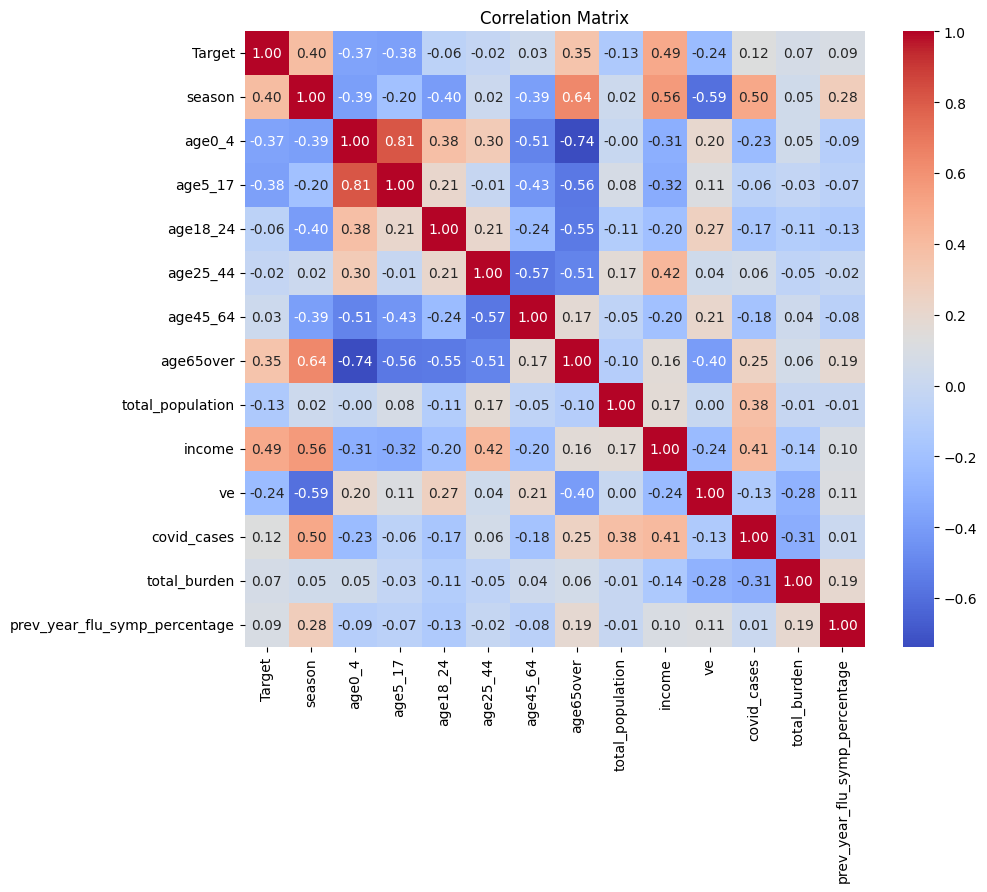

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate correlation matrix
correlation_matrix = train_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# **III. Model Training/Evaluation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [ ]:
def train_and_test(reg_model, X_train, y_train, X_test, y_test):
  reg_model.fit(X_train, y_train)
  y_pred = reg_model.predict(X_test)
  mse_score_val = mean_squared_error(y_test, y_pred)
  r2_score_val = r2_score(y_test, y_pred)
  comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
  return {"MSE_Score": mse_score_val, "R2_Score": r2_score_val, "Comparison": comparison_df}

### **1) Linear Regression**

In [ ]:
lr_model = LinearRegression()
train_and_test(lr_model, X_train, y_train, X_test, y_test)

{'MSE_Score': 9.358749856876607,
 'R2_Score': 0.7060258515355646,
 'Comparison':      Actual  Predicted
 592    61.1  56.073730
 310    39.6  39.218262
 291    46.0  46.866699
 63     51.7  51.121582
 350    51.0  48.892090
 ..      ...        ...
 70     49.9  48.678223
 405    43.6  47.401855
 381    52.1  53.672363
 542    47.3  43.685059
 18     37.9  42.085449
 
 [132 rows x 2 columns]}

In [ ]:
# Hyperparameter tuning & cross validation (Linear Regression)
lr_model = LinearRegression()

param_grid = {
    'fit_intercept': [True, False]
}

grid_search = GridSearchCV(estimator=lr_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

lr_best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = lr_best_model.predict(X_test)

mse_score_val = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Linear Regression Gridsearch")
print("Best Parameters:", best_params)
print("MSE Score:", mse_score_val)
print("R2 Score:", r2_score_val)
print("Comparison:", comparison_df)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Linear Regression Gridsearch
Best Parameters: {'fit_intercept': True}
MSE Score: 9.358749856876607
R2 Score: 0.7060258515355646
Comparison:      Actual  Predicted
592    61.1  56.073730
310    39.6  39.218262
291    46.0  46.866699
63     51.7  51.121582
350    51.0  48.892090
..      ...        ...
70     49.9  48.678223
405    43.6  47.401855
381    52.1  53.672363
542    47.3  43.685059
18     37.9  42.085449

[132 rows x 2 columns]


### **2) Gradient Boosting Regression**

In [ ]:
gbr_model = GradientBoostingRegressor()
train_and_test(gbr_model, X_train, y_train, X_test, y_test)

{'MSE_Score': 7.117401744806997,
 'R2_Score': 0.7764303834158445,
 'Comparison':      Actual  Predicted
 592    61.1  55.988834
 310    39.6  40.370446
 291    46.0  50.624626
 63     51.7  53.285085
 350    51.0  48.717093
 ..      ...        ...
 70     49.9  47.381679
 405    43.6  44.180717
 381    52.1  55.817486
 542    47.3  42.525599
 18     37.9  44.074421
 
 [132 rows x 2 columns]}

In [ ]:
# Hyperparameter tuning & cross validation (Gradient Boosting Regression)
gbr_model = GradientBoostingRegressor()

param_grid = {
    'learning_rate': [0.1, 1],
    'n_estimators': [1000, 1300],
    'max_depth': [2],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1]
}

grid_search = GridSearchCV(estimator=gbr_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

gbr_best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = gbr_best_model.predict(X_test)

mse_score_val = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("GBR Gridsearch")
print("Best Parameters:", best_params)
print("MSE Score:", mse_score_val)
print("R2 Score:", r2_score_val)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GBR Gridsearch
Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1300}
MSE Score: 4.583257523626253
R2 Score: 0.8560321358828461


### **3) Random Forest Regression**

In [ ]:
rfr_model = RandomForestRegressor()
train_and_test(rfr_model, X_train, y_train, X_test, y_test)

{'MSE_Score': 7.16363418181818,
 'R2_Score': 0.7749781444405917,
 'Comparison':      Actual  Predicted
 592    61.1     59.475
 310    39.6     41.829
 291    46.0     51.576
 63     51.7     53.226
 350    51.0     48.533
 ..      ...        ...
 70     49.9     47.973
 405    43.6     44.660
 381    52.1     56.071
 542    47.3     42.911
 18     37.9     42.341
 
 [132 rows x 2 columns]}

In [ ]:
rfr_model = RandomForestRegressor()

param_grid = {
    'n_estimators': [ 250, 300],
    'max_depth': [25, 30],
    'min_samples_split': [2,3],
    'max_features': ['sqrt'],
    'bootstrap': [False],
    'ccp_alpha': [0.0]
}

grid_search = GridSearchCV(estimator=rfr_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

rfr_best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = rfr_best_model.predict(X_test)

mse_score_val = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print("RFR Gridsearch")
print("Best Parameters:", best_params)
print("MSE Score:", mse_score_val)
print("R2 Score:", r2_score_val)
print("Comparison:", comparison_df)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
RFR Gridsearch
Best Parameters: {'bootstrap': False, 'ccp_alpha': 0.0, 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}
MSE Score: 8.669595728236745
R2 Score: 0.7276733473256987
Comparison:      Actual  Predicted
592    61.1  56.925000
310    39.6  43.429292
291    46.0  51.690603
63     51.7  49.885333
350    51.0  47.715732
..      ...        ...
70     49.9  46.044653
405    43.6  42.418083
381    52.1  53.519333
542    47.3  42.683524
18     37.9  43.150000

[132 rows x 2 columns]


### **4) K-Nearest Neighbors (KNN) Regression**

In [ ]:
knn_regressor = KNeighborsRegressor()
train_and_test(knn_regressor, X_train, y_train, X_test, y_test)

{'MSE_Score': 17.98110606060606,
 'R2_Score': 0.43518307215665775,
 'Comparison':      Actual  Predicted
 592    61.1      58.76
 310    39.6      43.98
 291    46.0      51.38
 63     51.7      46.08
 350    51.0      46.58
 ..      ...        ...
 70     49.9      45.14
 405    43.6      43.40
 381    52.1      52.58
 542    47.3      42.68
 18     37.9      44.28
 
 [132 rows x 2 columns]}

In [ ]:
# Hyperparameter tuning

import numpy as np

knn_regressor = KNeighborsRegressor()

param_grid = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

grid_search = GridSearchCV(estimator=knn_regressor,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

knn_best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = knn_best_model.predict(X_test)

mse_score_val = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print("Best Parameters:", best_params)
print("MSE Score:", mse_score_val)
print("R2 Score:", r2_score_val)
print("Comparison tabel:", comparison_df)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
MSE Score: 15.974143121094489
R2 Score: 0.49822516967666763
Comparison tabel:      Actual  Predicted
0      61.1  57.459817
1      39.6  44.547715
2      46.0  50.623947
3      51.7  47.633302
4      51.0  47.770626
..      ...        ...
127    49.9  44.915870
128    43.6  41.358587
129    52.1  55.222252
130    47.3  43.070383
131    37.9  42.867775

[132 rows x 2 columns]


### **5) Support Vector Regression (SVR)**

In [ ]:
svr_regressor = SVR()
train_and_test(svr_regressor, X_train, y_train, X_test, y_test)

{'MSE_Score': 17.021249166225193,
 'R2_Score': 0.46533379928246055,
 'Comparison':      Actual  Predicted
 592    61.1  53.215843
 310    39.6  44.119916
 291    46.0  49.435865
 63     51.7  46.886913
 350    51.0  46.032428
 ..      ...        ...
 70     49.9  46.102443
 405    43.6  46.026978
 381    52.1  51.592898
 542    47.3  43.757283
 18     37.9  45.572970
 
 [132 rows x 2 columns]}

In [ ]:
svr_regressor = SVR()

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100, 1000],
    'epsilon': [0.01, 0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=svr_regressor,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

svr_best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = svr_best_model.predict(X_test)

mse_score_val = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Best Parameters:", best_params)
print("MSE Score:", mse_score_val)
print("R2 Score:", r2_score_val)
print("Comparison tabel:", comparison_df)


Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Parameters: {'C': 100, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
MSE Score: 5.433803907037916
R2 Score: 0.8293150366316865
Comparison tabel:      Actual  Predicted
592    61.1  58.653080
310    39.6  39.347926
291    46.0  48.144659
63     51.7  41.899009
350    51.0  49.293815
..      ...        ...
70     49.9  46.127154
405    43.6  45.278158
381    52.1  53.701268
542    47.3  43.919487
18     37.9  42.629032

[132 rows x 2 columns]


### **6) Stochastic Gradient Descent (SGD)**

In [ ]:
sgd_regressor = SGDRegressor()
train_and_test(sgd_regressor, X_train, y_train, X_test, y_test)

{'MSE_Score': 9.258404927661791,
 'R2_Score': 0.7091778553362618,
 'Comparison':      Actual  Predicted
 592    61.1  54.969052
 310    39.6  38.869731
 291    46.0  46.870494
 63     51.7  47.722183
 350    51.0  48.368734
 ..      ...        ...
 70     49.9  48.937992
 405    43.6  46.679000
 381    52.1  53.863409
 542    47.3  43.002637
 18     37.9  42.356791
 
 [132 rows x 2 columns]}

In [ ]:
sgd_regressor = SGDRegressor()

param_grid = {
    'loss': ['squared_error', 'squared_epsilon_insensitive', 'huber', 'epsilon_insensitive'],
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l1', 'l2'],
    'max_iter': [1000, 2000, 2500],
    'tol': [1e-3, 1e-4, 1e-5]
}

grid_search = GridSearchCV(estimator=sgd_regressor,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

sgd_best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = sgd_best_model.predict(X_test)

mse_score_val = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Best Parameters:", best_params)
print("MSE Score:", mse_score_val)
print("R2 Score:", r2_score_val)
print("Comparison tabel:", comparison_df)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'alpha': 0.001, 'loss': 'squared_error', 'max_iter': 2000, 'penalty': 'l1', 'tol': 1e-05}
MSE Score: 8.848479869511229
R2 Score: 0.7220542941498818
Comparison tabel:      Actual  Predicted
592    61.1  54.852424
310    39.6  38.538083
291    46.0  46.521260
63     51.7  49.426922
350    51.0  48.833835
..      ...        ...
70     49.9  49.573948
405    43.6  47.547176
381    52.1  53.628536
542    47.3  42.491725
18     37.9  41.698569

[132 rows x 2 columns]


In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
train_and_test(ridge_model, X_train, y_train, X_test, y_test)

{'MSE_Score': 9.131859282093544,
 'R2_Score': 0.7131528679145148,
 'Comparison':      Actual  Predicted
 592    61.1  55.672998
 310    39.6  39.124576
 291    46.0  46.939484
 63     51.7  48.577480
 350    51.0  48.704391
 ..      ...        ...
 70     49.9  49.235960
 405    43.6  46.875114
 381    52.1  53.923040
 542    47.3  43.245193
 18     37.9  42.125100
 
 [132 rows x 2 columns]}

### **7) Neural networks**

In [ ]:
from keras.models import Sequential

clf = Sequential()

In [ ]:
from keras.layers import Dense
from keras.layers import Dropout

# layer for input data
clf.add(Dense(units=128,
              kernel_initializer='uniform',
              activation='relu',
              input_dim=X_train.shape[1]))

clf.add(Dense(units=64,
              kernel_initializer='uniform',
              activation='relu'))

dropout = 0.3
clf.add(Dropout(dropout))

clf.add(Dense(units=1,
              kernel_initializer='uniform'))

clf.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mse'])


In [ ]:
clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8704      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
 dense_3 (Dense)             (None, 64)                128       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [ ]:
from keras.callbacks import TensorBoard
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

EPOCHS = 100
BATCH_SIZE = 16

history = clf.fit(X_train,
                  y_train,
                  validation_split = 0.2,
                  batch_size = BATCH_SIZE,
                  epochs = EPOCHS,
                  callbacks=[tensorboard_callback])

Epoch 1/100
27/27 [==============================] - 12s 32ms/step - loss: 1716.0892 - mse: 1716.0892 - val_loss: 275.7520 - val_mse: 275.7520
Epoch 2/100
27/27 [==============================] - 1s 21ms/step - loss: 639.0180 - mse: 639.0180 - val_loss: 199.8888 - val_mse: 199.8888
Epoch 3/100
27/27 [==============================] - 1s 19ms/step - loss: 416.6039 - mse: 416.6039 - val_loss: 242.9104 - val_mse: 242.9104
Epoch 4/100
27/27 [==============================] - 1s 20ms/step - loss: 366.1921 - mse: 366.1921 - val_loss: 154.7736 - val_mse: 154.7736
Epoch 5/100
27/27 [==============================] - 0s 18ms/step - loss: 297.3221 - mse: 297.3221 - val_loss: 59.3117 - val_mse: 59.3117
Epoch 6/100
27/27 [==============================] - 1s 21ms/step - loss: 301.2014 - mse: 301.2014 - val_loss: 16.6913 - val_mse: 16.6913
Epoch 7/100
27/27 [==============================] - 1s 22ms/step - loss: 283.2021 - mse: 283.2021 - val_loss: 23.4346 - val_mse: 23.4346
Epoch 8/100
27/27 [====

In [ ]:
y_pred = clf.predict(X_test)
y_test = y_test.ravel()
y_pred = y_pred.ravel()

mse_score_val = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("MSE Score:", mse_score_val)
print("R2 Score:", r2_score_val)
print("Comparison tabel:", comparison_df)

5/5 [==============================] - 0s 6ms/step
MSE Score: 12.440606998966468
R2 Score: 0.6092195106363893
Comparison tabel:      Actual  Predicted
0      61.1  53.820080
1      39.6  43.912983
2      46.0  47.202843
3      51.7  46.193455
4      51.0  47.282917
..      ...        ...
127    49.9  48.181953
128    43.6  45.635456
129    52.1  51.700424
130    47.3  44.145645
131    37.9  44.911831

[132 rows x 2 columns]


# IV. Feature Importance/Selection

In [ ]:


# Access feature importances
feature_importances = gbr_best_model.feature_importances_

# Combine feature names with importances
feature_importance_pairs = zip(feature_names, feature_importances)

# Sort feature importance pairs by importance (descending order)
sorted_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Print feature importances in descending order
print("Feature importances (descending order):")
for feature_name, importance in sorted_importance_pairs:
    print(f"{feature_name}: {importance}")



Feature importances (descending order):
income: 0.17117023145565644
season: 0.1328438768543525
age5_17: 0.12881553876920468
age45_64: 0.046311455933351925
prev_year_flu_death_percentage: 0.04553103685893656
Florida: 0.04382540919885859
South Dakota: 0.03803962026906192
total_population: 0.0364821070638829
Rhode Island: 0.03407360932926312
Nevada: 0.03403224656164625
age25_44: 0.025604433003705424
age0_4: 0.02530793373925624
age18_24: 0.019624145816001855
total_burden: 0.018411341194233204
prev_year_hospitalizations_percentage: 0.017297544529467496
Iowa: 0.015830055836696298
Montana: 0.011801738378031862
ve: 0.011509658609254703
Minnesota: 0.009974183082151452
Idaho: 0.009912811162955504
Arizona: 0.009312352425958494
Nebraska: 0.009069672096801252
prev_year_flu_visit_percentage: 0.008996878819922864
age65over: 0.008659351552889964
Mississippi: 0.007994982390094387
Alaska: 0.007458348865783919
Wyoming: 0.0072891917009819925
prev_year_flu_symp_percentage: 0.007138857111279027
Oregon: 0.00

In [ ]:
# Filter out feature importance pairs where importance is not equal to zero
nonzero_importance_pairs = [(feature_name, importance) for feature_name, importance in sorted_importance_pairs if importance != 0]

# Print feature importances in descending order, excluding features with zero importance
print("Feature importances (descending order, excluding features with zero importance):")
for feature_name, importance in nonzero_importance_pairs:
    print(f"{feature_name}: {importance}")


Feature importances (descending order, excluding features with zero importance):
income: 0.17117023145565644
season: 0.1328438768543525
age5_17: 0.12881553876920468
age45_64: 0.046311455933351925
prev_year_flu_death_percentage: 0.04553103685893656
Florida: 0.04382540919885859
South Dakota: 0.03803962026906192
total_population: 0.0364821070638829
Rhode Island: 0.03407360932926312
Nevada: 0.03403224656164625
age25_44: 0.025604433003705424
age0_4: 0.02530793373925624
age18_24: 0.019624145816001855
total_burden: 0.018411341194233204
prev_year_hospitalizations_percentage: 0.017297544529467496
Iowa: 0.015830055836696298
Montana: 0.011801738378031862
ve: 0.011509658609254703
Minnesota: 0.009974183082151452
Idaho: 0.009912811162955504
Arizona: 0.009312352425958494
Nebraska: 0.009069672096801252
prev_year_flu_visit_percentage: 0.008996878819922864
age65over: 0.008659351552889964
Mississippi: 0.007994982390094387
Alaska: 0.007458348865783919
Wyoming: 0.0072891917009819925
prev_year_flu_symp_perc

In [ ]:
top_40_importance_pairs = sorted_importance_pairs[:40]

print("Top 40 feature importances (descending order):")
for rank, (feature_name, importance) in enumerate(top_40_importance_pairs, start=1):
    print(f"{rank}. {feature_name}: {importance}")

Top 40 feature importances (descending order):
1. income: 0.17117023145565644
2. season: 0.1328438768543525
3. age5_17: 0.12881553876920468
4. age45_64: 0.046311455933351925
5. prev_year_flu_death_percentage: 0.04553103685893656
6. Florida: 0.04382540919885859
7. South Dakota: 0.03803962026906192
8. total_population: 0.0364821070638829
9. Rhode Island: 0.03407360932926312
10. Nevada: 0.03403224656164625
11. age25_44: 0.025604433003705424
12. age0_4: 0.02530793373925624
13. age18_24: 0.019624145816001855
14. total_burden: 0.018411341194233204
15. prev_year_hospitalizations_percentage: 0.017297544529467496
16. Iowa: 0.015830055836696298
17. Montana: 0.011801738378031862
18. ve: 0.011509658609254703
19. Minnesota: 0.009974183082151452
20. Idaho: 0.009912811162955504
21. Arizona: 0.009312352425958494
22. Nebraska: 0.009069672096801252
23. prev_year_flu_visit_percentage: 0.008996878819922864
24. age65over: 0.008659351552889964
25. Mississippi: 0.007994982390094387
26. Alaska: 0.007458348865

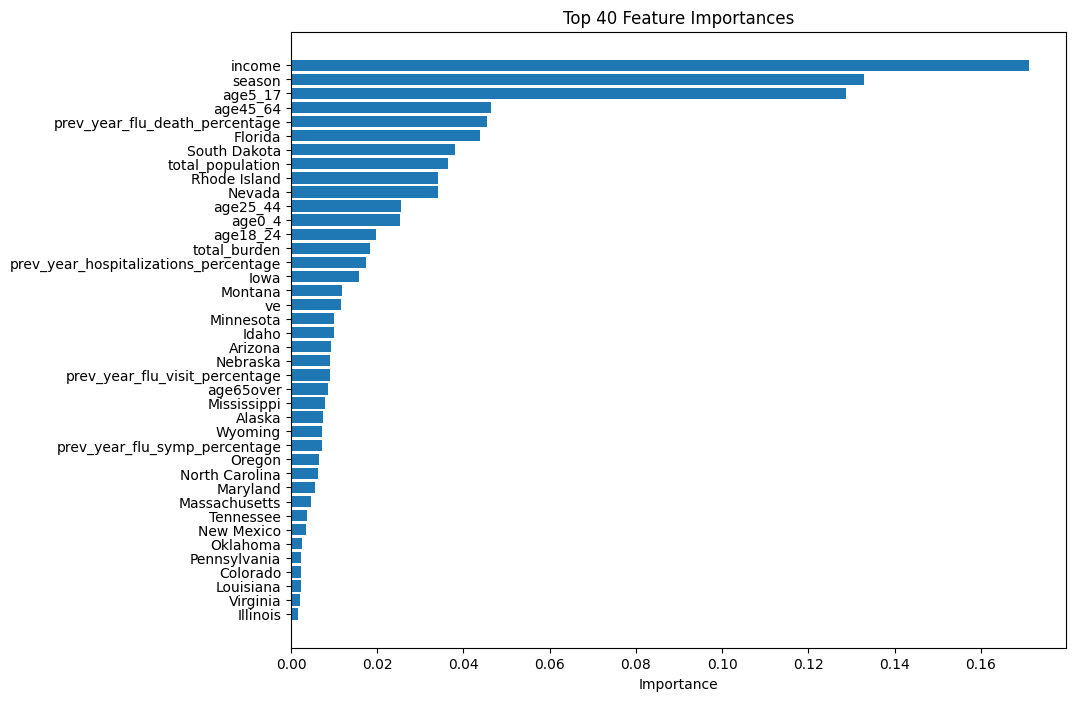

In [ ]:
import matplotlib.pyplot as plt

feature_names = [pair[0] for pair in top_40_importance_pairs]
importances = [pair[1] for pair in top_40_importance_pairs]

plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_names)), importances, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Importance')
plt.title('Top 40 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Extract feature names with non-zero importance
top_40_features = [feature_name for feature_name, importance in top_40_importance_pairs]

# Filter columns in X_train and X_test based on non-zero feature names
X_train_filtered = X_train[top_40_features]
X_test_filtered = X_test[top_40_features]


In [ ]:
feature_names = X_train_filtered.columns.tolist()

# Print feature names
print("Feature names:")
print(feature_names)

Feature names:
['income', 'season', 'age5_17', 'age45_64', 'prev_year_flu_death_percentage', 'Florida', 'South Dakota', 'total_population', 'Rhode Island', 'Nevada', 'age25_44', 'age0_4', 'age18_24', 'total_burden', 'prev_year_hospitalizations_percentage', 'Iowa', 'Montana', 've', 'Minnesota', 'Idaho', 'Arizona', 'Nebraska', 'prev_year_flu_visit_percentage', 'age65over', 'Mississippi', 'Alaska', 'Wyoming', 'prev_year_flu_symp_percentage', 'Oregon', 'North Carolina', 'Maryland', 'Massachusetts', 'Tennessee', 'New Mexico', 'Oklahoma', 'Pennsylvania', 'Colorado', 'Louisiana', 'Virginia', 'Illinois']


In [ ]:
X_train_filtered.shape

(526, 40)

In [ ]:
X_train.shape

(526, 67)

# V. Model Training/Evaluation v2 (after feature selection)


## 1) Linear Regression

In [ ]:
lr_model = LinearRegression()
train_and_test(lr_model, X_train_filtered, y_train, X_test_filtered, y_test)

{'MSE_Score': 9.8202387457159,
 'R2_Score': 0.691529705661696,
 'Comparison':      Actual  Predicted
 592    61.1  54.541525
 310    39.6  38.146017
 291    46.0  47.630392
 63     51.7  50.114767
 350    51.0  48.913595
 ..      ...        ...
 70     49.9  49.492146
 405    43.6  47.834555
 381    52.1  52.396017
 542    47.3  43.259118
 18     37.9  40.888205
 
 [132 rows x 2 columns]}

In [ ]:
# Hyperparameter tuning & cross validation (Linear Regression)
lr_model = LinearRegression()

param_grid = {
    'fit_intercept': [True, False]
}

grid_search = GridSearchCV(estimator=lr_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_train_filtered, y_train)

lr_top40_best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = lr_top40_best_model.predict(X_test_filtered)

mse_score_val = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)

#comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print("Best Parameters:", best_params)
print("MSE Score:", mse_score_val)
print("R2 Score:", r2_score_val)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'fit_intercept': True}
MSE Score: 9.785960103478104
R2 Score: 0.6926064557422604


## 2) Gradient Boosting Regression

In [ ]:
gbr_model = GradientBoostingRegressor()
train_and_test(gbr_model, X_train_filtered, y_train, X_test_filtered, y_test)

{'MSE_Score': 6.748423768794327,
 'R2_Score': 0.7880206051825641,
 'Comparison':      Actual  Predicted
 0      61.1  56.120757
 1      39.6  40.113284
 2      46.0  50.317748
 3      51.7  52.869545
 4      51.0  48.999863
 ..      ...        ...
 127    49.9  47.229177
 128    43.6  44.317848
 129    52.1  55.346985
 130    47.3  43.308603
 131    37.9  43.748845
 
 [132 rows x 2 columns]}

In [ ]:
# Hyperparameter tuning & cross validation (Gradient Boosting Regression): after feature selection
gbr_model = GradientBoostingRegressor()

param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 8],
    'min_samples_split': [10, 13],
    'min_samples_leaf': [1, 3, 5]
}

grid_search = GridSearchCV(estimator=gbr_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_train_filtered, y_train)

gbr_top40_best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = gbr_top40_best_model.predict(X_test_filtered)

mse_score_val = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print("Comparison:", comparison_df)
print("Best Parameters:", best_params)
print("MSE Score:", mse_score_val)
print("R2 Score:", r2_score_val)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Comparison:      Actual  Predicted
0      61.1  58.770680
1      39.6  40.987564
2      46.0  51.921432
3      51.7  52.452157
4      51.0  49.853072
..      ...        ...
127    49.9  47.884486
128    43.6  45.140032
129    52.1  55.010723
130    47.3  46.161839
131    37.9  42.623476

[132 rows x 2 columns]
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 1000}
MSE Score: 5.11156813166394
R2 Score: 0.8394370068861576


		Best Parameters: {'alpha': 0.95, 'init': 'zero', 'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 1300, 'subsample': 0.8, 'verbose': 2, 'warm_start': True}
		MSE Score: 4.267217366908613
		R2 Score: 0.8659594912852739

In [ ]:
# Hyperparameter tuning & cross validation (Gradient Boosting Regression): after feature selection
gbr_model = GradientBoostingRegressor()

param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [1300],
    'max_depth': [3],
    'min_samples_split': [13],
    'min_samples_leaf': [3],
    'subsample': [0.8],  # Example values for subsample
    'max_features': ['sqrt'],  # Example values for max_features
    'loss': ['huber'],  # Example values for loss function
    'alpha': [0.95],  # Example values for alpha (regularization)
    'init': ['zero'],  # Example values for init
    'verbose': [2],  # Example values for verbosity
    'warm_start': [True]
}

grid_search = GridSearchCV(estimator=gbr_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_train_filtered, y_train)

gbr_top40_best_model_2 = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = gbr_top40_best_model_2.predict(X_test_filtered)

mse_score_val = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print("Comparison:", comparison_df)
print("Best Parameters:", best_params)
print("MSE Score:", mse_score_val)
print("R2 Score:", r2_score_val)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
      Iter       Train Loss      OOB Improve   Remaining Time 
         1         935.3484         218.6482            7.85s
         2         759.6150         177.4545            6.83s
         3         617.5547         144.5299            6.13s
         4         510.2877         112.6418            6.03s
         5         411.2834          93.2121            5.92s
         6         337.6185          74.3189            5.87s
         7         277.1962          59.7164            5.76s
         8         222.0094          50.3794            5.67s
         9         184.0088          39.7106            5.63s
        10         151.3121          31.9760            5.51s
        11         122.7835          26.2828            5.50s
        12          99.0146          23.0903            5.48s
        13          79.7741          19.7821            5.41s
        14          69.0576          14.5325            5.34s
        15

## 3) Random Forest Regression

In [ ]:
rfr_model = RandomForestRegressor()
train_and_test(rfr_model, X_train_filtered, y_train, X_test_filtered, y_test)

{'MSE_Score': 7.905455962121206,
 'R2_Score': 0.7516762687080422,
 'Comparison':      Actual  Predicted
 592    61.1     61.171
 310    39.6     42.809
 291    46.0     51.436
 63     51.7     52.458
 350    51.0     48.182
 ..      ...        ...
 70     49.9     48.116
 405    43.6     45.066
 381    52.1     56.627
 542    47.3     43.621
 18     37.9     41.904
 
 [132 rows x 2 columns]}

In [ ]:
rfr_model = RandomForestRegressor() # With filtered results

param_grid = {
    'n_estimators': [200, 250, 300],
    'max_depth': [20, 25, 30],
    'min_samples_split': [2,3],
    'max_features': ['sqrt'],
    'bootstrap': [False],
    'ccp_alpha': [0.0, 0.001, 0.01]
}

grid_search = GridSearchCV(estimator=rfr_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_train_filtered, y_train)

rfr_top40_best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = rfr_top40_best_model.predict(X_test_filtered)

mse_score_val = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print("RFR Gridsearch")
print("Best Parameters:", best_params)
print("MSE Score:", mse_score_val)
print("R2 Score:", r2_score_val)
print("Comparison:", comparison_df)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
RFR Gridsearch
Best Parameters: {'bootstrap': False, 'ccp_alpha': 0.0, 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}
MSE Score: 8.372485121788365
R2 Score: 0.7370060935649024
Comparison:      Actual  Predicted
0      61.1  58.269667
1      39.6  42.909444
2      46.0  51.672000
3      51.7  49.997667
4      51.0  47.632315
..      ...        ...
127    49.9  46.153495
128    43.6  42.929889
129    52.1  54.062667
130    47.3  43.107519
131    37.9  43.274000

[132 rows x 2 columns]


## 4) KNN Regression

In [ ]:
knn_regressor = KNeighborsRegressor()
train_and_test(knn_regressor, X_train_filtered, y_train, X_test_filtered, y_test)

{'MSE_Score': 16.798818181818184,
 'R2_Score': 0.4723207323913853,
 'Comparison':      Actual  Predicted
 592    61.1      57.72
 310    39.6      45.30
 291    46.0      50.20
 63     51.7      44.66
 350    51.0      46.92
 ..      ...        ...
 70     49.9      48.50
 405    43.6      41.14
 381    52.1      55.48
 542    47.3      42.38
 18     37.9      41.60
 
 [132 rows x 2 columns]}

## 5) SVR

In [ ]:
svr_regressor = SVR()

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100, 1000],
    'epsilon': [0.01, 0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=svr_regressor,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_train_filtered, y_train)

svr_top40_best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = svr_top40_best_model.predict(X_test_filtered)

mse_score_val = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Best Parameters:", best_params)
print("MSE Score:", mse_score_val)
print("R2 Score:", r2_score_val)
print("Comparison tabel:", comparison_df)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Parameters: {'C': 100, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'rbf'}
MSE Score: 6.268631430285968
R2 Score: 0.8030916933417499
Comparison tabel:      Actual  Predicted
0      61.1  59.271679
1      39.6  40.677522
2      46.0  50.093136
3      51.7  44.782732
4      51.0  49.532801
..      ...        ...
127    49.9  48.030157
128    43.6  45.188101
129    52.1  55.894482
130    47.3  43.616063
131    37.9  42.616958

[132 rows x 2 columns]


## 6) SGD

In [ ]:
sgd_regressor = SGDRegressor()
train_and_test(sgd_regressor, X_train_filtered, y_train, X_test_filtered, y_test)

{'MSE_Score': 10.259255919221927,
 'R2_Score': 0.6777394343416578,
 'Comparison':      Actual  Predicted
 592    61.1  56.189743
 310    39.6  38.613730
 291    46.0  47.482901
 63     51.7  51.358178
 350    51.0  48.695325
 ..      ...        ...
 70     49.9  49.601364
 405    43.6  48.106687
 381    52.1  52.364813
 542    47.3  42.927612
 18     37.9  44.102254
 
 [132 rows x 2 columns]}